## SQL을 활용한 테러 데이터 집계 분석  
## Aggregate analysis of terrorism data using SQL


### 전처리된 데이터 로드 및 SQLite 데이터베이스 연결  
### Load the cleaned dataset and connect to a SQLite database


In [1]:
import pandas as pd
import sqlite3

# 전처리된 데이터 로드
df = pd.read_parquet("data/interim/gtd_clean.parquet")

# SQLite DB 연결
conn = sqlite3.connect("data/interim/gtd.db")

# 테이블 생성
df.to_sql("terror", conn, if_exists="replace", index=False)

df.shape


(139872, 20)

### SQL 기반 지역별 테러 발생 건수 집계  
### Aggregate number of terrorist incidents by region using SQL


In [2]:
query_region = """
SELECT 
    region_txt, 
    COUNT(*) AS attacks
FROM terror
GROUP BY region_txt
ORDER BY attacks DESC;
"""

region_sql = pd.read_sql(query_region, conn)
region_sql


,region_txt,attacks
0,Middle East & North Africa,48856
1,South Asia,46965
2,Sub-Saharan Africa,19240
3,Southeast Asia,11576
4,Eastern Europe,4195
5,Western Europe,3891
6,South America,3376
7,North America,1036
8,Central Asia,245
9,East Asia,243


### SQL 집계 결과 시각화  
### Visualize aggregated results obtained from SQL queries


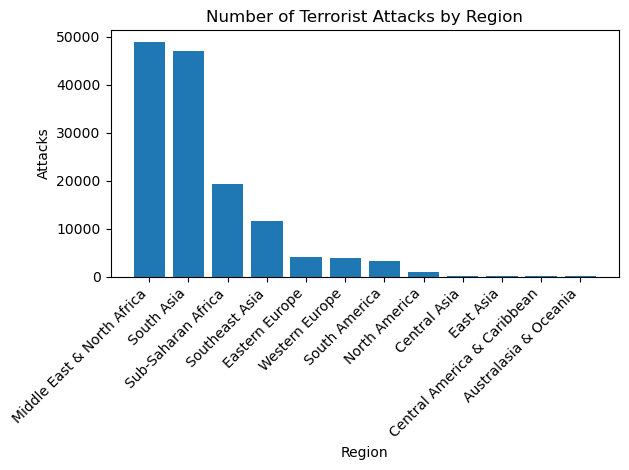

In [3]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(region_sql["region_txt"], region_sql["attacks"])
plt.title("Number of Terrorist Attacks by Region")
plt.xlabel("Region")
plt.ylabel("Attacks")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### 연도별 테러 발생 건수 및 사망자 수 집계  
### Yearly aggregation of terrorist attacks and fatalities using SQL


In [4]:
query_year = """
SELECT 
    iyear, 
    COUNT(*) AS attacks,
    SUM(nkill) AS deaths
FROM terror
GROUP BY iyear
ORDER BY iyear;
"""

year_sql = pd.read_sql(query_year, conn)
year_sql.head(10)


,iyear,attacks,deaths
0,2000,1823,4394.0
1,2001,1912,7729.0
2,2002,1330,4797.0
3,2003,1280,3317.0
4,2004,1164,5716.0
5,2005,2017,6343.0
6,2006,2757,9316.0
7,2007,3250,12825.0
8,2008,4801,9244.0
9,2009,4723,9277.0


### 데이터베이스 연결 종료  
### Close the database connection


In [7]:
conn.close()
